In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [150]:
# silence unessary warnings!
%matplotlib inline

In [151]:
df_train = pd.read_csv('data/train.csv')

In [152]:
df_train

,Train_ID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,60,RL,88.0,12128,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,11,2006,WD,Abnorml,209000
1,2,120,RL,48.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,254000
2,3,50,RL,120.0,17360,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,172500
3,4,20,RL,73.0,8688,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,232000
4,5,80,RL,88.0,15312,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,COD,Normal,148000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,1566,60,RL,107.0,13641,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,492000
1566,1567,20,RL,90.0,11664,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,250000
1567,1568,80,RL,88.0,15400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,165000
1568,1569,20,RL,NaN,9790,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,143000


In [153]:
# iterating the columns 
for col in df_train.columns: 
    print(col) 


Train_ID
MS SubClass
MS Zoning
Lot Frontage
Lot Area
Street
Alley
Lot Shape
Land Contour
Utilities
Lot Config
Land Slope
Neighborhood
Condition 1
Condition 2
Bldg Type
House Style
Overall Qual
Overall Cond
Year Built
Year Remod/Add
Roof Style
Roof Matl
Exterior 1st
Exterior 2nd
Mas Vnr Type
Mas Vnr Area
Exter Qual
Exter Cond
Foundation
Bsmt Qual
Bsmt Cond
Bsmt Exposure
BsmtFin Type 1
BsmtFin SF 1
BsmtFin Type 2
BsmtFin SF 2
Bsmt Unf SF
Total Bsmt SF
Heating
Heating QC
Central Air
Electrical
1st Flr SF
2nd Flr SF
Low Qual Fin SF
Gr Liv Area
Bsmt Full Bath
Bsmt Half Bath
Full Bath
Half Bath
Bedroom AbvGr
Kitchen AbvGr
Kitchen Qual
TotRms AbvGrd
Functional
Fireplaces
Fireplace Qu
Garage Type
Garage Yr Blt
Garage Finish
Garage Cars
Garage Area
Garage Qual
Garage Cond
Paved Drive
Wood Deck SF
Open Porch SF
Enclosed Porch
3Ssn Porch
Screen Porch
Pool Area
Pool QC
Fence
Misc Feature
Misc Val
Mo Sold
Yr Sold
Sale Type
Sale Condition
SalePrice


In [154]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Train_ID         1570 non-null   int64  
 1   MS SubClass      1570 non-null   int64  
 2   MS Zoning        1570 non-null   object 
 3   Lot Frontage     1306 non-null   float64
 4   Lot Area         1570 non-null   int64  
 5   Street           1570 non-null   object 
 6   Alley            98 non-null     object 
 7   Lot Shape        1570 non-null   object 
 8   Land Contour     1570 non-null   object 
 9   Utilities        1570 non-null   object 
 10  Lot Config       1570 non-null   object 
 11  Land Slope       1570 non-null   object 
 12  Neighborhood     1570 non-null   object 
 13  Condition 1      1570 non-null   object 
 14  Condition 2      1570 non-null   object 
 15  Bldg Type        1570 non-null   object 
 16  House Style      1570 non-null   object 
 17  Overall Qual  

In [155]:
df_train["SalePrice"].describe()

count      1570.000000
mean     183176.052229
std       81524.931669
min       13100.000000
25%      131000.000000
50%      162500.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice'>

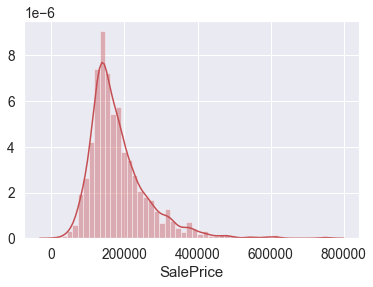

In [156]:
sns.distplot(df_train["SalePrice"],color='r')

<AxesSubplot:>

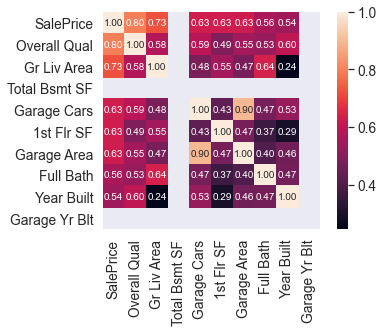

In [157]:
i = 10 
# i = 20
cols = df_train.corr().nlargest(i, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True,
           fmt='.2f', annot_kws={'size': 10},
         xticklabels=cols.values, yticklabels=cols.values )

<AxesSubplot:xlabel='SalePrice'>

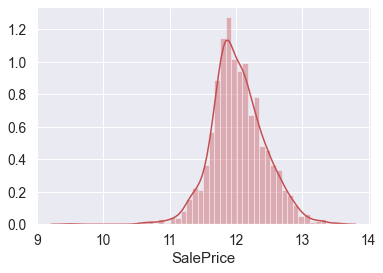

In [158]:
train_df = pd.read_csv("data/train.csv", index_col=0)
test_df = pd.read_csv("data/test.csv", index_col=0)
y_train = np.log1p(train_df.pop("SalePrice"))
sns.distplot(y_train, color='r')

(0.0, 800000.0)

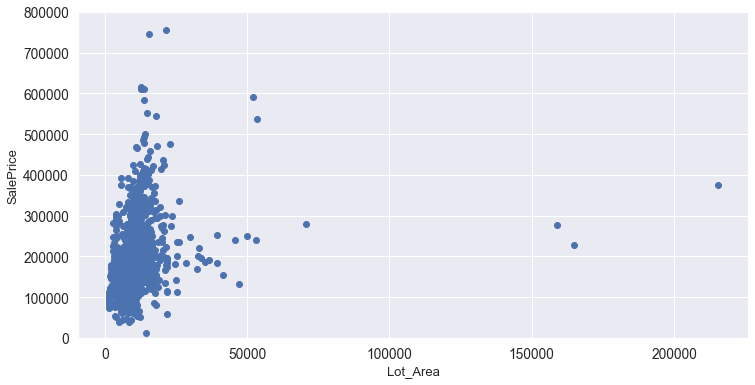

In [159]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]
plt.figure(figsize=(12,6))
plt.scatter(x=train["Lot_Area"], y=train.SalePrice)
plt.xlabel("Lot_Area", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)
    


In [160]:


train.drop(train[(train["Lot_Area"]>50000)&(train["SalePrice"]<400000)].index,inplace=True)
full=pd.concat([train,test], ignore_index=True)
full.drop(['Train_ID'],axis=1, inplace=True)
full.drop(['Test_ID'],axis=1, inplace=True)
full.shape
full.head()
full.info()
aa = full.isnull().sum()
aa[aa>0].sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS_SubClass      2774 non-null   int64  
 1   MS_Zoning        2774 non-null   object 
 2   Lot_Frontage     2308 non-null   float64
 3   Lot_Area         2774 non-null   int64  
 4   Street           2774 non-null   object 
 5   Alley            189 non-null    object 
 6   Lot_Shape        2774 non-null   object 
 7   Land_Contour     2774 non-null   object 
 8   Utilities        2774 non-null   object 
 9   Lot_Config       2774 non-null   object 
 10  Land_Slope       2774 non-null   object 
 11  Neighborhood     2774 non-null   object 
 12  Condition_1      2774 non-null   object 
 13  Condition_2      2774 non-null   object 
 14  Bldg_Type        2774 non-null   object 
 15  House_Style      2774 non-null   object 
 16  Overall_Qual     2774 non-null   int64  
 17  Overall_Cond  

Pool_QC           2762
Misc_Feature      2673
Alley             2585
Fence             2236
Fireplace_Qu      1345
SalePrice         1210
Lot_Frontage       466
Garage_Yr_Blt      154
Garage_Cond        154
Garage_Qual        154
Garage_Finish      154
Garage_Type        152
Bsmt_Exposure       77
BsmtFin_Type_2      75
Bsmt_Cond           74
Bsmt_Qual           74
BsmtFin_Type_1      74
Mas_Vnr_Type        22
Mas_Vnr_Area        22
Bsmt_Half_Bath       2
Bsmt_Full_Bath       2
Garage_Cars          1
BsmtFin_SF_2         1
BsmtFin_SF_1         1
Bsmt_Unf_SF          1
Total_Bsmt_SF        1
Garage_Area          1
Electrical           1
dtype: int64

In [161]:


full.isnull().sum()[full.isnull().sum()>0]


Lot_Frontage       466
Alley             2585
Mas_Vnr_Type        22
Mas_Vnr_Area        22
Bsmt_Qual           74
Bsmt_Cond           74
Bsmt_Exposure       77
BsmtFin_Type_1      74
BsmtFin_SF_1         1
BsmtFin_Type_2      75
BsmtFin_SF_2         1
Bsmt_Unf_SF          1
Total_Bsmt_SF        1
Electrical           1
Bsmt_Full_Bath       2
Bsmt_Half_Bath       2
Fireplace_Qu      1345
Garage_Type        152
Garage_Yr_Blt      154
Garage_Finish      154
Garage_Cars          1
Garage_Area          1
Garage_Qual        154
Garage_Cond        154
Pool_QC           2762
Fence             2236
Misc_Feature      2673
SalePrice         1210
dtype: int64

In [162]:
full.groupby(['Neighborhood'])[['Lot_Frontage']].agg(['mean','median','count'])

Lot_Frontage             
                     mean median count
Neighborhood                          
Blmngtn         46.900000   43.0    20
Blueste         28.125000   24.0     8
BrDale          21.500000   21.0    30
BrkSide         55.804598   51.0    87
ClearCr         89.526316   81.0    19
CollgCr         71.159420   70.0   207
Crawfor         69.256757   68.0    74
Edwards         67.463855   65.0   166
Gilbert         74.346154   63.5   104
Greens          41.000000   40.0     7
GrnHill               NaN    NaN     0
IDOTRR          62.512195   60.0    82
Landmrk               NaN    NaN     0
MeadowV         25.903226   21.0    31
Mitchel         74.694118   74.0    85
NAmes           75.150142   73.0   353
NPkVill         26.900000   24.0    20
NWAmes          81.512500   80.0    80
NoRidge         92.326923   89.0    52
NridgHt         84.909677   93.0   155
OldTown         61.922374   60.0   219
SWISU           59.261905   60.0    42
Sawyer          74.638298   72.0    94
SawyerW         70.610000   67.0   100
Somerst         64.743590   72.5   156
StoneBr         62.173913   60.0    46
Timber          79.836364   81.0    55
Veenker         72.000000   80.0    16

In [163]:
full["LotAreaCut"] = pd.qcut(full.Lot_Area,10)


full.groupby(['LotAreaCut'])[['Lot_Frontage']].agg(['mean','median','count'])
full['Lot_Frontage']=full.groupby(['LotAreaCut','Neighborhood'])['Lot_Frontage'].transform(lambda x: x.fillna(x.median()))

full['Lot_Frontage']=full.groupby(['LotAreaCut'])['Lot_Frontage'].transform(lambda x: x.fillna(x.median()))


/usr/local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [164]:
# handle missing values in basement, more information we
# can read from description
cols=[  
       "BsmtFin_SF_2", "Bsmt_Unf_SF", "Total_Bsmt_SF"
     ,"Full_Bath", "Half_Bath", "Fireplace_Qu"]
for col in cols:
    full[col].fillna(0, inplace=True)


cols1 = ["Pool_QC", "Mas_Vnr_Area","Garage_Cars","Garage_Area", "Misc_Feature", "Alley", "Fence", "Fireplace_Qu", 
         "Garage_Qual", "Garage_Cond", "Garage_Finish", "Garage_Yr_Blt", 
         "Garage_Type", "Bsmt_Exposure", "Bsmt_Cond", "Bsmt_Qual", "BsmtFin_Type_2"
         , "BsmtFin_SF_1", "Mas_Vnr_Type"]
for col in cols1:
    full[col].fillna("None", inplace=True)

# fill in with mode
cols2 = ["BsmtFin_Type_1","MS_Zoning", "Bsmt_Full_Bath", "Bsmt_Half_Bath", "Utilities", "Functional", "Electrical", 
         "Kitchen_Qual", "Sale_Type","Exterior_1st", "Exterior_2nd"]
for col in cols2:
    full[col].fillna(full[col].mode()[0], inplace=True)

full.isnull().sum()[full.isnull().sum()>0]

SalePrice    1210
dtype: int64

In [165]:
print('---Feature Engineering---')
    
NumStr = ["MS_SubClass","Bsmt_Full_Bath","Bsmt_Half_Bath",
          "Half_Bath","Bedroom_AbvGr","Kitchen_AbvGr","Mo_Sold",
          "Yr_Sold","Year_Built","Year_Remod/Add","Low_Qual_Fin_SF","Garage_Yr_Blt"]
for col in NumStr:
    full[col]=full[col].astype(str)

full.groupby(['MS_SubClass'])[['SalePrice']].agg(['mean','median','count'])


---Feature Engineering---


SalePrice                
                      mean    median count
MS_SubClass                               
120          213778.710280  200000.0   107
150                    NaN       NaN     0
160          135690.000000  146000.0    65
180          101375.000000   91500.0     8
190          126931.730769  127750.0    26
20           185662.855903  157000.0   576
30            97787.642857   99700.0    70
40           126000.000000  133000.0     3
45           112857.142857  113000.0     7
50           135864.437086  130000.0   151
60           240687.043344  219210.0   323
70           160656.129032  148250.0    62
75           214266.666667  179500.0    15
80           168823.515625  165000.0    64
85           152896.296296  149900.0    27
90           146822.016667  143476.5    60

In [166]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


def map_into_new_values():
    full["oMSSubClass"] = full.MS_SubClass.map({'180':1, 
                                        '30':2, '45':2, 
                                        '190':3, '50':3, '90':3, 
                                        '85':4, '40':4, '160':4, 
                                        '70':5, '20':5, '75':5, '80':5, '150':5,
                                        '120': 6, '60':6})
    
    full["oMSZoning"] = full.MS_Zoning.map({'C (all)':1, 'RH':2, 'RM':2, 'RL':3, 'FV':4})
    
    full["oNeighborhood"] = full.Neighborhood.map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})
    
    full["oCondition1"] = full.Condition_1.map({'Artery':1,
                                           'Feedr':2, 'RRAe':2,
                                           'Norm':3, 'RRAn':3,
                                           'PosN':4, 'RRNe':4,
                                           'PosA':5 ,'RRNn':5})
    
    full["oBldgType"] = full.Bldg_Type.map({'2fmCon':1, 'Duplex':1, 'Twnhs':1, '1Fam':2, 'TwnhsE':2})
    
    full["oHouseStyle"] = full.House_Style.map({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})
    
    full["oExterior1st"] = full.Exterior_1st.map({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})
    
    full["oMasVnrType"] = full.Mas_Vnr_Type.map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})
    
    full["oExterQual"] = full.Exter_Qual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    full["oFoundation"] = full.Foundation.map({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
    
    full["oBsmtQual"] = full.Bsmt_Qual.map({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oBsmtExposure"] = full.Bsmt_Exposure.map({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
    
    full["oHeating"] = full.Heating.map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':5})
    
    full["oHeatingQC"] = full.Heating_QC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oKitchenQual"] = full.Kitchen_Qual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    full["oFunctional"] = full.Functional.map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})
    
    full["oFireplaceQu"] = full.Fireplace_Qu.map({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    full["oGarageType"] = full.Garage_Type.map({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5})
    
    full["oGarageFinish"] = full.Garage_Finish.map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})
    
    full["oPavedDrive"] = full.Paved_Drive.map({'N':1, 'P':2, 'Y':3})
    
    full["oSaleType"] = full.Sale_Type.map({'COD':1, 'ConLD':1, 'ConLI':1, 'ConLw':1, 'Oth':1, 'WD':1,
                                       'CWD':2, 'Con':3, 'New':3})
    
    full["oSaleCondition"] = full.Sale_Condition.map({'AdjLand':1, 'Abnorml':2, 'Alloca':2, 'Family':2, 'Normal':3, 'Partial':4})            
                
                        
                        
    
    return "map_into_new_values"


class labelenc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        lab=LabelEncoder()
        X["Year_Built"] = lab.fit_transform(X["Year_Built"])
        X["Year_Remod/Add"] = lab.fit_transform(X["Year_Remod/Add"])
        X["Garage_Yr_Blt"] = lab.fit_transform(X["Garage_Yr_Blt"])
        return X

    
class skew_dummies(BaseEstimator, TransformerMixin):
    def __init__(self,skew=0.5):
        self.skew = skew
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X_numeric=X.select_dtypes(exclude=["object"])
        skewness = X_numeric.apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= self.skew].index
        X[skewness_features] = np.log1p(X[skewness_features])
        X = pd.get_dummies(X)
        return X

In [167]:
map_into_new_values()
# drop two unwanted columns
full.drop("LotAreaCut",axis=1,inplace=True)
full.drop('SalePrice',axis=1,inplace=True)


# build pipeline
pipe = Pipeline([
    ('labenc', labelenc()),
    ('skew_dummies', skew_dummies(skew=1)),
    ])


In [168]:
# save the original data for later use
full2 = full.copy()
data_pipe = pipe.fit_transform(full2)
data_pipe.head()

,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,1st_Flr_SF,...,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
0,4.488636,9.403355,6,4,95,39,0.0,319.0,6.767343,7.180831,...,0,0,0,1,1,0,0,0,0,0
1,3.891820,8.738896,8,5,112,56,0.0,461.0,7.189168,7.189168,...,0,0,0,1,0,0,0,0,1,0
2,4.795791,9.761982,6,6,55,0,0.0,482.0,6.663133,6.927558,...,0,0,0,1,0,0,0,0,1,0
3,4.304065,9.069813,7,5,111,55,0.0,1616.0,7.388328,7.388328,...,0,0,0,1,0,0,0,0,1,0
4,4.488636,9.636457,6,5,66,10,0.0,550.0,7.037906,7.037906,...,0,0,0,0,0,0,0,0,1,0


In [169]:
scaler = RobustScaler()

n_train=train.shape[0]

X = data_pipe[:n_train]
test_X = data_pipe[n_train:]
y= train.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)

X_scaled = np.nan_to_num(X_scaled)
y_log = np.nan_to_num(y_log)

test_X_scaled = scaler.transform(test_X)

In [170]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge



lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled,y_log)


Lasso(alpha=0.001)

In [171]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=data_pipe.columns)

In [172]:
FI_lasso.sort_values("Feature Importance",ascending=False)


,Feature Importance
Overall_Qual,0.119150
Gr_Liv_Area,0.103782
1st_Flr_SF,0.085926
Garage_Cars_3.0,0.062523
oNeighborhood,0.057763
...,...
Kitchen_Qual_Gd,-0.019925
Bsmt_Unf_SF,-0.021405
BsmtFin_Type_1_Unf,-0.024227
Bsmt_Full_Bath_0.0,-0.027915


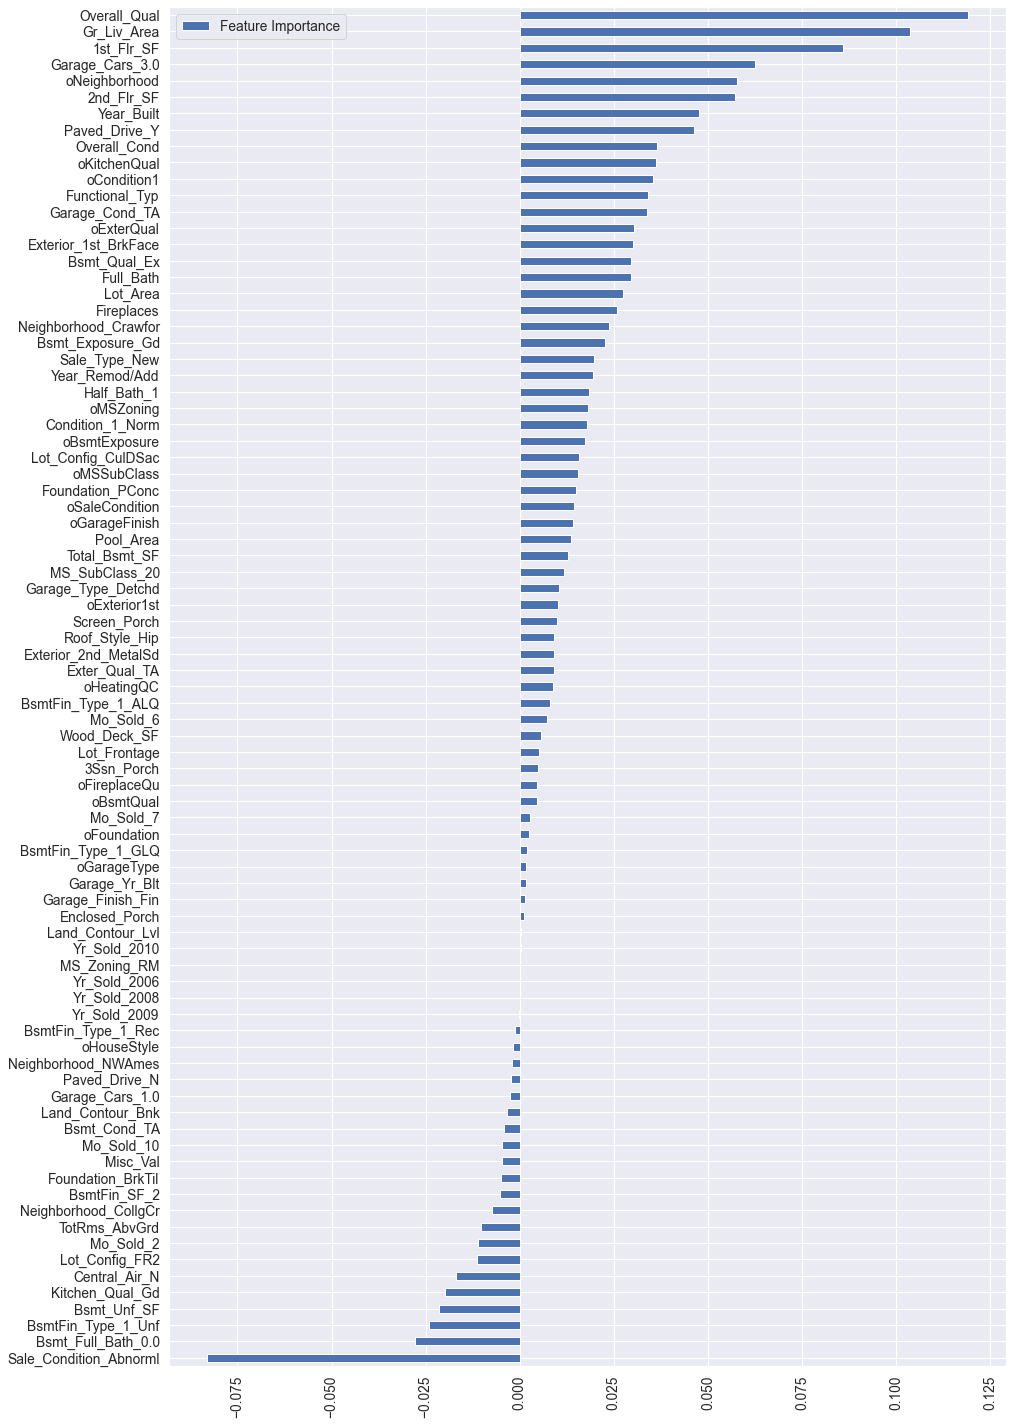

In [173]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

In [174]:
class add_feature(BaseEstimator, TransformerMixin):
    def __init__(self,additional=1):
        self.additional = additional
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):

            return X

In [175]:
pipe = Pipeline([
    ('labenc', labelenc()),
    ('add_feature', add_feature(additional=2)),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [176]:
full_pipe = pipe.fit_transform(full)

In [177]:
n_train=train.shape[0]
X = full_pipe[:n_train]
test_X = full_pipe[n_train:]
y= train.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train.SalePrice)
test_X_scaled = scaler.transform(test_X)

X_scaled = np.nan_to_num(X_scaled)
y_log = np.nan_to_num(y_log)
test_X_scaled = np.nan_to_num(test_X_scaled)

In [178]:
pca = PCA(n_components=410)

In [179]:
X_scaled=pca.fit_transform(X_scaled)
test_X_scaled = pca.transform(test_X_scaled)

In [180]:

# define cross validation strategy
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [181]:
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor()]

In [182]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_scaled, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 0.136084, 0.0113
Ridge: 0.128681, 0.0123
Lasso: 0.137851, 0.0098
RF: 0.162437, 0.0122
GBR: 0.148550, 0.0135
SVR: 0.142575, 0.0203


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

LinSVR: 0.127248, 0.0103
Ela: 0.119310, 0.0121
SGD: 0.151563, 0.0139
Bay: 0.117443, 0.0128
Ker: 0.116651, 0.0127
Extra: 0.157509, 0.0123


In [183]:
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w
    
grid(Lasso()).grid_get(X_scaled,y_log,{'alpha': [0.0004,0.0005,0.0007,0.0006,0.0009,0.0008],'max_iter':[10000]})
grid(Ridge()).grid_get(X_scaled,y_log,{'alpha':[35,40,45,50,55,60,65,70,80,90]})
grid(SVR()).grid_get(X_scaled,y_log,{'C':[11,12,13,14,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]})
param_grid={'alpha':[0.2,0.3,0.4,0.5], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1,1.2]}
grid(KernelRidge()).grid_get(X_scaled,y_log,param_grid)
grid(ElasticNet()).grid_get(X_scaled,y_log,{'alpha':[0.0005,0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3,0.5,0.7],'max_iter':[10000]})


lasso = Lasso(alpha=0.0005,max_iter=10000)
ridge = Ridge(alpha=60)
svr = SVR(gamma= 0.0004,kernel='rbf',C=13,epsilon=0.009)
ker = KernelRidge(alpha=0.2 ,kernel='polynomial',degree=3 , coef0=0.8)
ela = ElasticNet(alpha=0.005,l1_ratio=0.08,max_iter=10000)
bay = BayesianRidge()

w1 = 0.02
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = 0.03
w6 = 0.2

weight_avg = AverageWeight(mod = [lasso,ridge,svr,ker,ela,bay],weight=[w1,w2,w3,w4,w5,w6])
weight_avg = AverageWeight(mod = [svr,ker],weight=[0.5,0.5])

class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean


{'alpha': 0.0006, 'max_iter': 10000} 0.1199880217595848
                                 params  mean_test_score  std_test_score
0  {'alpha': 0.0004, 'max_iter': 10000}         0.120393        0.003045
1  {'alpha': 0.0005, 'max_iter': 10000}         0.120055        0.002959
2  {'alpha': 0.0007, 'max_iter': 10000}         0.120100        0.002872
3  {'alpha': 0.0006, 'max_iter': 10000}         0.119988        0.002901
4  {'alpha': 0.0009, 'max_iter': 10000}         0.120197        0.002853
5  {'alpha': 0.0008, 'max_iter': 10000}         0.120173        0.002873
{'alpha': 35} 0.11713357279947331
          params  mean_test_score  std_test_score
0  {'alpha': 35}         0.117134        0.002971
1  {'alpha': 40}         0.117159        0.002955
2  {'alpha': 45}         0.117218        0.002942
3  {'alpha': 50}         0.117302        0.002931
4  {'alpha': 55}         0.117405        0.002922
5  {'alpha': 60}         0.117521        0.002914
6  {'alpha': 65}         0.117648        0.002906

In [184]:
# must do imputer first, otherwise stacking won't work, and i don't know why.
a = imputer.fit_transform(X_scaled)
b = imputer.fit_transform(y_log.reshape(-1,1)).ravel()

In [185]:
# stack_model = stacking(mod=[ker],meta_model=ker)
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

In [186]:
stack_model.fit(a,b)

stacking(meta_model=KernelRidge(alpha=0.2, coef0=0.8, kernel='polynomial'),
         mod=[Lasso(alpha=0.0005, max_iter=10000), Ridge(alpha=60),
              SVR(C=13, epsilon=0.009, gamma=0.0004),
              KernelRidge(alpha=0.2, coef0=0.8, kernel='polynomial'),
              ElasticNet(alpha=0.005, l1_ratio=0.08, max_iter=10000),
              BayesianRidge()])

In [187]:
pred = np.exp(stack_model.predict(test_X_scaled))


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:79: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:79: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:79: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:79: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support 

In [188]:
result=pd.DataFrame({'Test_ID':test.Test_ID, 'SalePrice':pred})
result.to_csv("submission.csv",index=False)

In [189]:
print('-------Task B------')

-------Task B------


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead


[[      nan       nan]
 [0.000e+00 1.774e+05]
 [1.000e+00 1.906e+05]]
(313, 2)
x= [nan  0.  1.]
y= [    nan 177400. 190600.]
sp.sum(sp.isnan(y))= 1
[0. 1. 2.]
[177400. 190600. 189200.]


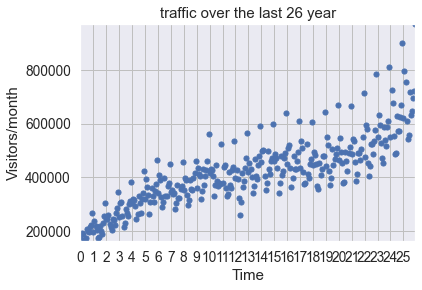

In [201]:
import os
import scipy as sp

sp.random.seed(3)

data = sp.genfromtxt("data/MyVisitors.csv", delimiter=",")
print(data[:3])
print(data.shape)

x = data[:,0]
y = data[:,1]
print('x=', x[:3])
print('y=', y[:3])

print('sp.sum(sp.isnan(y))=',sp.sum(sp.isnan(y)) )
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]
print(x[:3])
print(y[:3])

import matplotlib.pyplot as plt

plt.scatter(x,y, s=26)
plt.title("traffic over the last 26 year")
plt.xlabel("Time")
plt.ylabel("Visitors/month")
plt.xticks([w*12 for w in range(26)],
    ['%i' % w for w in range(26)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.p

[[      nan       nan]
 [0.000e+00 1.774e+05]
 [1.000e+00 1.906e+05]]
(313, 2)
########## [  1229.75866859 228179.89882854] [1.62777855e+12] 2 [1.36577087 0.366974  ] 6.927791673660977e-14 ##########
Model parameters of fp1: [  1229.75866859 228179.89882854]
Error of the model of fp1: [1.62777855e+12]
error= 1627778546842.062


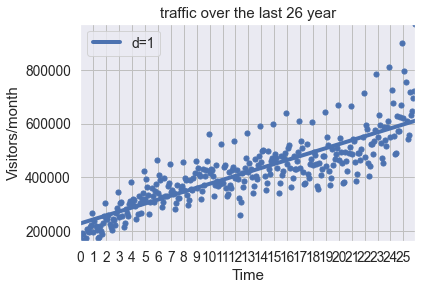

In [205]:
import os
import scipy as sp
from termcolor import colored,cprint
import matplotlib.pyplot as plt

# http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

sp.random.seed(3)

def error(f, x,y):
    return sp.sum( (f(x) - y)**2 )

data = sp.genfromtxt("data/MyVisitors.csv", delimiter=",")
print(data[:3])
print(data.shape)

x = data[:,0]
y = data[:,1]

x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

plt.scatter(x,y, s=26)
plt.title("traffic over the last 26 year")
plt.xlabel("Time")
plt.ylabel("Visitors/month")
plt.xticks([w*12 for w in range(26)],
    ['%i' % w for w in range(26)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
# plt.show()



# create and plot models
fp1, res1, rank1, sv1, rcond1 = sp.polyfit(x, y, 1, full=True)
print('#'*10,fp1, res1, rank1, sv1, rcond1,'#'*10)
print("Model parameters of fp1: %s" % fp1)
print("Error of the model of fp1:", res1)
f1 = sp.poly1d(fp1)
print(colored('error=','red'),error(f1, x, y))

fx = sp.linspace(0,x[-1], 1000) 
# generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4)
plt.legend(["d=%i" % f1.order], loc="upper left")
plt.show()

In [212]:
for i in range(312, 312+12):
    r = fp1[0]*i + fp1[1]
    print('future month ', i, ' predict visitors:',r)

future month  312  predict visitors: 611864.6034297964
future month  313  predict visitors: 613094.3620983902
future month  314  predict visitors: 614324.120766984
future month  315  predict visitors: 615553.8794355777
future month  316  predict visitors: 616783.6381041715
future month  317  predict visitors: 618013.3967727652
future month  318  predict visitors: 619243.155441359
future month  319  predict visitors: 620472.9141099527
future month  320  predict visitors: 621702.6727785466
future month  321  predict visitors: 622932.4314471403
future month  322  predict visitors: 624162.1901157341
future month  323  predict visitors: 625391.9487843278


In [214]:
yvals=np.polyval(fp1, list(range(312, 312+12)))
yvals

array([611864.6034298 , 613094.36209839, 614324.12076698, 615553.87943558,
       616783.63810417, 618013.39677277, 619243.15544136, 620472.91410995,
       621702.67277855, 622932.43144714, 624162.19011573, 625391.94878433])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.isnan is deprecated and will be removed in SciPy 2.0.0, use numpy.isnan instead
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_laun

[[      nan       nan]
 [0.000e+00 1.774e+05]
 [1.000e+00 1.906e+05]]
(313, 2)
########## [  1229.75866859 228179.89882854] [1.62777855e+12] 2 [1.36577087 0.366974  ] 6.927791673660977e-14 ##########
Model parameters of fp1: [  1229.75866859 228179.89882854]
Error of the model of fp1: [1.62777855e+12]
error= 1627778546842.062
f2p= [ 1.91989464e-06 -1.27035928e-03  3.24575342e-01 -4.38340011e+01
  4.34336121e+03  1.62188453e+05]
error= 1319145205394.9678


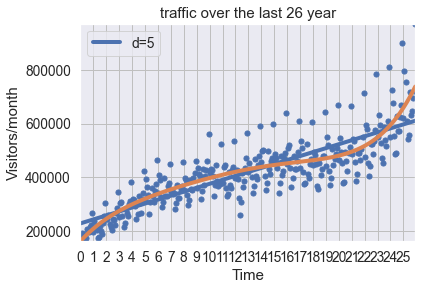

In [220]:
import os
import scipy as sp
from termcolor import colored,cprint
import matplotlib.pyplot as plt

# http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

sp.random.seed(3)

def error(f, x,y):
    return sp.sum( (f(x) - y)**2 )
data = sp.genfromtxt("data/MyVisitors.csv", delimiter=",")
print(data[:3])
print(data.shape)

x = data[:,0]
y = data[:,1]

x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

plt.scatter(x,y, s=26)
plt.title("traffic over the last 26 year")
plt.xlabel("Time")
plt.ylabel("Visitors/month")
plt.xticks([w*12 for w in range(26)],
    ['%i' % w for w in range(26)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
# plt.show()




# create and plot models
fp1, res1, rank1, sv1, rcond1 = sp.polyfit(x, y, 1, full=True)
print('#'*10,fp1, res1, rank1, sv1, rcond1,'#'*10)
print("Model parameters of fp1: %s" % fp1)
print("Error of the model of fp1:", res1)
f1 = sp.poly1d(fp1)
print(colored('error=','red'),error(f1, x, y))

fx = sp.linspace(0,x[-1], 1000) 
# generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4)
plt.legend(["d=%i" % f1.order], loc="upper left")




# n次系数
f2p = sp.polyfit(x, y, 5)
print('f2p=',f2p)
f2 = sp.poly1d(f2p)
print(colored('error=','red'),error(f2,x,y))
fx2 = sp.linspace(0,x[-1], 1000) 
# generate X-values for plotting
plt.plot(fx2, f2(fx2), linewidth=4)
plt.legend(["d=%i" % f2.order], loc="upper left")







plt.show()



In [219]:
yvals=np.polyval(f2p, list(range(312, 312+12)))
i = 0
for y in yvals:
    
    print('future month ', i+1, 'n-degree-coefficient-curve predict visitors:',y)
    i += 1

future month  1 n-degree-coefficient-curve predict visitors: 746489.1380864521
future month  2 n-degree-coefficient-curve predict visitors: 755001.3900901556
future month  3 n-degree-coefficient-curve predict visitors: 763719.5045037749
future month  4 n-degree-coefficient-curve predict visitors: 772647.192118837
future month  5 n-degree-coefficient-curve predict visitors: 781788.2055798827
future month  6 n-degree-coefficient-curve predict visitors: 791146.3396148467
future month  7 n-degree-coefficient-curve predict visitors: 800725.431265444
future month  8 n-degree-coefficient-curve predict visitors: 810529.3601175563
future month  9 n-degree-coefficient-curve predict visitors: 820562.048531628
future month  10 n-degree-coefficient-curve predict visitors: 830827.4618730447
future month  11 n-degree-coefficient-curve predict visitors: 841329.6087425204
future month  12 n-degree-coefficient-curve predict visitors: 852072.541206494
